<a href="https://colab.research.google.com/github/NaumanAnwar97/LinearRegression/blob/main/Salary_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nauman Anwar  (22I-0123)

# Linear Regression Model

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Reading data from the 'dataset.csv' using pandas as dataframe
data = pd.read_csv('salary_data.csv')
data.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Checking the distribution of YearsExperience & Salary




(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]), array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
        9.56, 10.5 ]), <BarContainer object of 10 artists>)


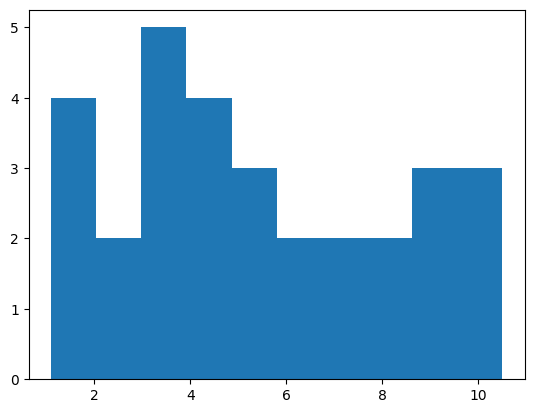

In [7]:
import matplotlib.pyplot as plt

YearDist = plt.hist(data.YearsExperience)
print(YearDist)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]), array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
        96993., 105459., 113925., 122391.]), <BarContainer object of 10 artists>)


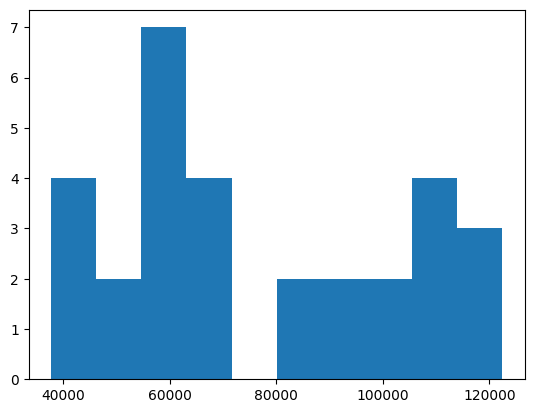

In [9]:
SalDist = plt.hist(data.Salary)
print(SalDist)

### The Histogram clearly shows that the data does not follow normal distribution.


To normalize the data we can apply log transformation to the Salary variable.
:

In [45]:
import numpy as np
df = np.log(data)

# df = pd.DataFrame({
#     'Salary': np.log(data['Salary']),
#     'YearsExperience': data['YearsExperience']
# })

df.head(5)

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


(array([3., 2., 0., 7., 5., 0., 2., 2., 3., 6.]), array([10.53823732, 10.6559112 , 10.77358508, 10.89125896, 11.00893284,
       11.12660672, 11.2442806 , 11.36195448, 11.47962836, 11.59730224,
       11.71497612]), <BarContainer object of 10 artists>)


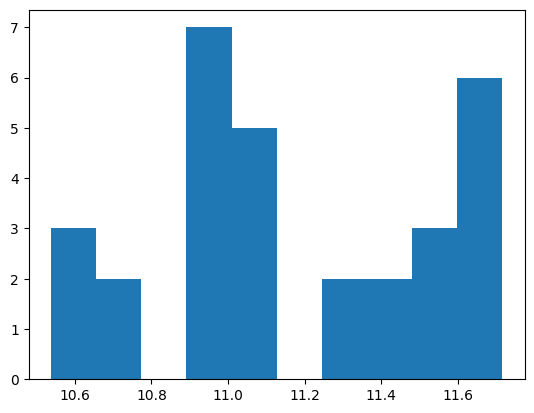

In [46]:
SalDist = plt.hist(df.Salary)
print(SalDist)

Now, the data is approx. normally distributed.
We can now perform regression analysis.

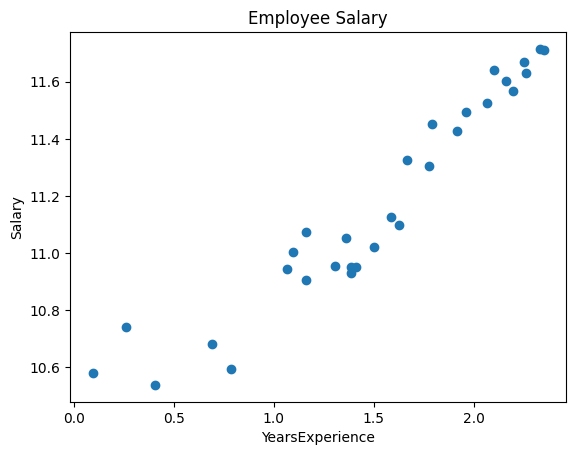

In [47]:
# Plot the data points as a scatter plot
plt.scatter(df.YearsExperience, df.Salary)

# Set the labels for the x and y axes
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# Set the title for the plot
plt.title('Employee Salary')

# Display the plot
plt.show()

In [48]:
def plot_data(m, b, df):
    # Plot the data points as a scatter plot
    plt.scatter(df.YearsExperience, df.Salary)

    # Plot the line defined by y = m * x + b
    min = int(df.YearsExperience.min())
    max = int(df.YearsExperience.max())+2
    plt.plot(list(range(min, max)), [m * x + b for x in range(min, max)], color='red')

    # Set the labels for the x and y axes
    plt.xlabel('Hours Studied')
    plt.ylabel('Salary')

    # Set the title for the plot
    plt.title('Employee Salary')

    # Display the plot
    plt.show()

In [49]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    totalError = 0

    # Loop through all the points in the dataset
    for i in range(0, len(points)):
        # Get the x and y values of the current point
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary

        # Calculate the error for this point and add it to the total error
        totalError += (y - (m * x + c)) ** 2

        # Return the average error for all points
        return totalError / float(len(points))


In [50]:
def gradien_descent(m_now, b_now, points, L):
    # Initialize the gradients for m and b to 0
    m_gradient = 0
    b_gradient = 0

    # Get the number of points in the dataset
    n = len(points)

    # Loop through all the points in the dataset
    for i in range(n):
        # Get the x and y values of the current point
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary

        # Calculate the partial derivatives of the loss function with respect to m and b
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))

    # Update m and b using gradient descent
    m = m_now - (L * m_gradient)
    b = b_now - (L * b_gradient)

    # Return the updated values of m and b
    return m, b

##  **Increased** the *Epoch* from 200 -> 300.
##  **Increased** the *learning Rate* from 0.001 -> 0.01

Epoch 0 - Error: 3.552925038840276


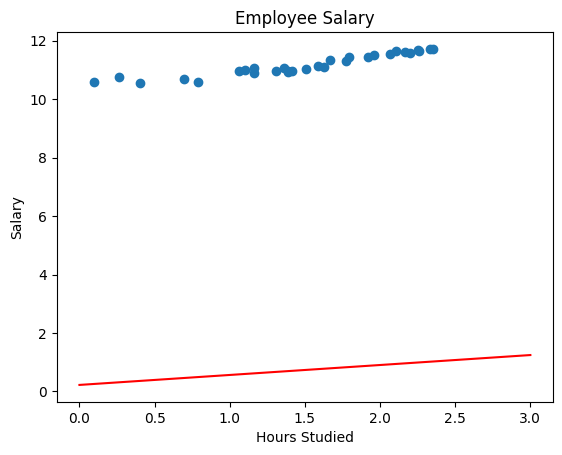

None
Epoch 50 - Error: 1.4224665075713927


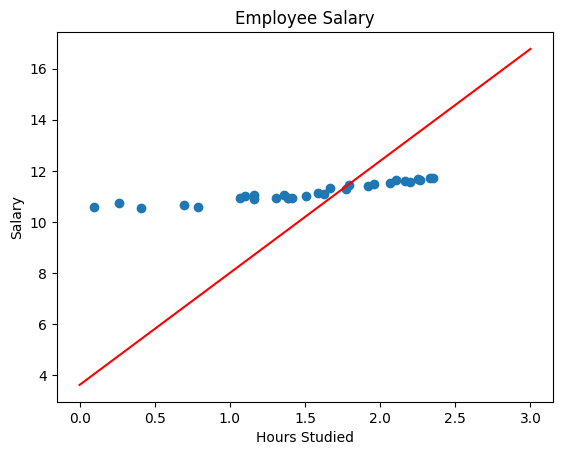

None
Epoch 100 - Error: 1.1294365082683409


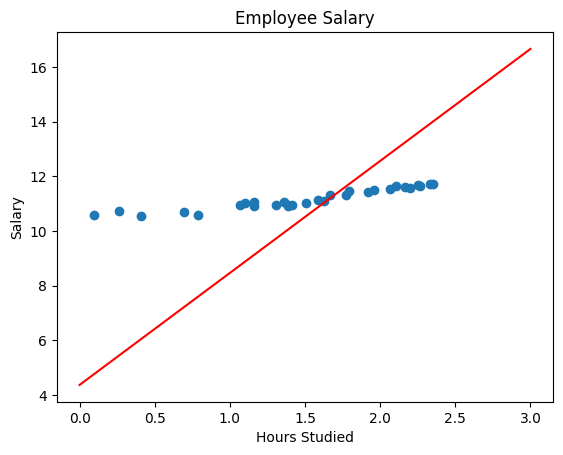

None
Epoch 150 - Error: 0.9188383623392916


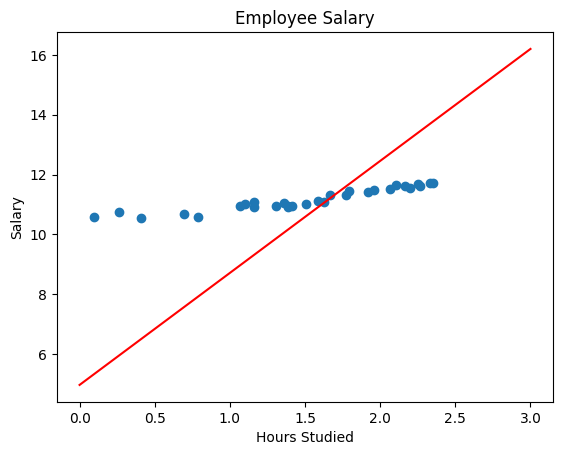

None
Epoch 200 - Error: 0.7486314958884296


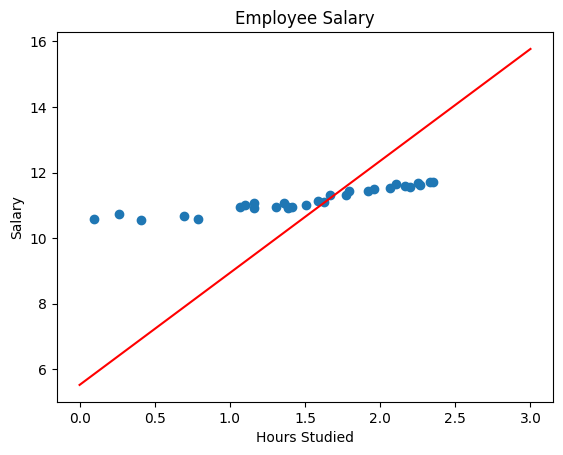

None
Epoch 250 - Error: 0.6105231841669728


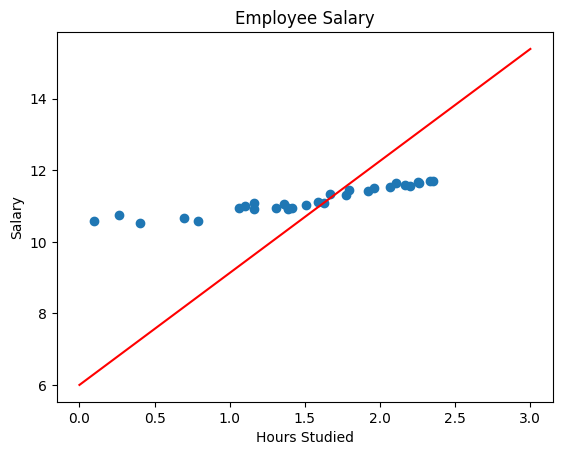

None
m = 2.875355358186867, b = 6.431425798315918


In [51]:
# Initialize the values of m and b to 0
m = 0
b = 0
error_list = []
# Set the learning rate and number of epochs for gradient descent
lr = 0.01
epochs = 300

# Perform gradient descent for the specified number of epochs
for i in range(epochs):
    # Update m and b using gradient descent
    m, b = gradien_descent(m, b, df, lr)
    error = loss_function(m, b, df)
    error_list.append(error)
    # Every 50 epochs, plot the data and the current line being fit to the data
    if i % 50 == 0 or i == 0:
        # Print the current epoch number and the error for this epoch
        print("Epoch {0} - Error: {1}".format(i, error))
        plot_data(m, b, df)
        print(plt.show())
        # also plot error and epoch number in a graph to see how error is decreasing

        # input('Press enter to continue...')

# Print the final values of m and b
print("m = {0}, b = {1}".format(m, b))



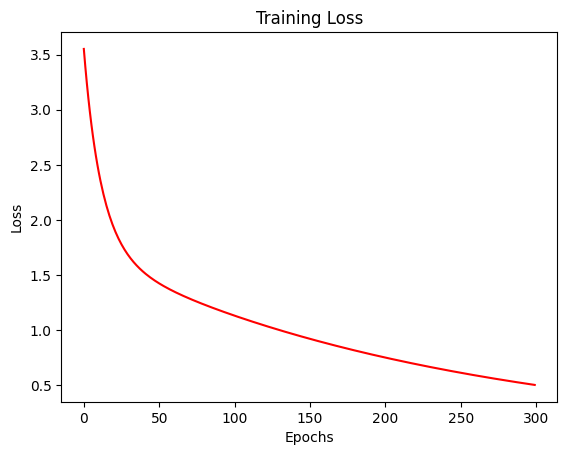

In [52]:
# plot the training loss and accuracy for each epoch in a graph using matplotlib library
plt.plot(list(range(epochs)), error_list, color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [53]:
# print the accuracy in percentage of the model on the dataset using the loss function
print(f'Accuracy: {100 - loss_function(m, b, df)}%')

Accuracy: 99.49958329211306%


In [54]:
# store your model in a file named 'model.pkl' using pickle library
import pickle
print("Saving model to disk : model.pkl values m and b are" , m, b )
with open('linearmodel.pkl', 'wb') as f:
    pickle.dump([m, b], f)


Saving model to disk : model.pkl values m and b are 2.875355358186867 6.431425798315918


In [63]:
# load the model from the file named 'linearmodel.pkl' using pickle library
import pickle
with open('linearmodel.pkl', 'rb') as f:
    m, b = pickle.load(f)

x = np.log(float(input("Enter the Years of Experience: ")))
prediction = np.exp(m * x + b)
print(f'Predicted Salary is: {prediction}')

Enter the Years of Experience: 5.5
Predicted Salary is: 83548.48154844133


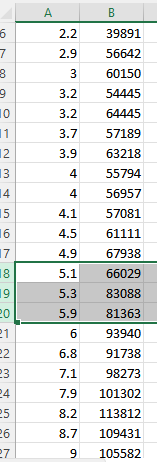

## Hence, our calculated parameters are predicting the ***Salary *** with a great precision.

### For 5.5 Years of Experience, we are predicting $ 83548.48 Salary